In [1]:
import tensorflow.keras as keras
from tensorflow.keras import models, layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split

In [67]:
import tensorflow.keras as keras
from tensorflow.keras import models, layers
test = pd.read_csv(r'C:\Users\anujk\Documents\crash\test.csv')
data = pd.read_csv(r'C:\Users\anujk\Documents\crash\train.csv')
test = test.set_index('Accident_ID')
data = data.set_index('Accident_ID')
le.fit(list(data.Severity.unique()))

LabelEncoder()

In [3]:
data.insert(0,'Severity_labeled',(le.transform(data.Severity.tolist())))
data = data.drop(['Severity'], axis =1)

In [4]:
X = data.drop('Severity_labeled', axis =1)
Y = data.Severity_labeled

In [5]:
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = data_scaler.fit_transform(X)

In [6]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y)

In [7]:
Y_train = np.asarray(Y_train)
Y_test = np.asarray(Y_test)
X_test = np.asarray(X_test)
X_train = np.asarray(X_train)
test = np.asarray(test)

In [97]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(500,input_shape=(7500,10,), activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

In [98]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.05, momentum=0.8, nesterov=False),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
his = model.fit(X_train, Y_train, epochs=100)

Train on 7500 samples
Epoch 1/100
7500/7500 [==============================] - 1s 173us/sample - loss: 1.3614 - accuracy: 0.3304
Epoch 2/100
7500/7500 [==============================] - 1s 103us/sample - loss: 1.3334 - accuracy: 0.3973
Epoch 3/100
7500/7500 [==============================] - 1s 104us/sample - loss: 1.3027 - accuracy: 0.4559
Epoch 4/100
7500/7500 [==============================] - 1s 101us/sample - loss: 1.2684 - accuracy: 0.4997
Epoch 5/100
7500/7500 [==============================] - 1s 103us/sample - loss: 1.2330 - accuracy: 0.5400
Epoch 6/100
7500/7500 [==============================] - 1s 101us/sample - loss: 1.2055 - accuracy: 0.5548
Epoch 7/100
7500/7500 [==============================] - 1s 103us/sample - loss: 1.1811 - accuracy: 0.5793
Epoch 8/100
7500/7500 [==============================] - 1s 114us/sample - loss: 1.1597 - accuracy: 0.6243
Epoch 9/100
7500/7500 [==============================] - 1s 109us/sample - loss: 1.1425 - accuracy: 0.6435
Epoch 10/100
75

Epoch 77/100
7500/7500 [==============================] - 1s 104us/sample - loss: 1.0327 - accuracy: 0.7161
Epoch 78/100
7500/7500 [==============================] - 1s 107us/sample - loss: 1.0327 - accuracy: 0.7145
Epoch 79/100
7500/7500 [==============================] - 1s 103us/sample - loss: 1.0323 - accuracy: 0.7145
Epoch 80/100
7500/7500 [==============================] - 1s 100us/sample - loss: 1.0328 - accuracy: 0.7135
Epoch 81/100
7500/7500 [==============================] - 1s 102us/sample - loss: 1.0322 - accuracy: 0.7145
Epoch 82/100
7500/7500 [==============================] - 1s 107us/sample - loss: 1.0319 - accuracy: 0.7145
Epoch 83/100
7500/7500 [==============================] - 1s 104us/sample - loss: 1.0311 - accuracy: 0.7164
Epoch 84/100
7500/7500 [==============================] - 1s 100us/sample - loss: 1.0313 - accuracy: 0.7155
Epoch 85/100
7500/7500 [==============================] - 1s 99us/sample - loss: 1.0320 - accuracy: 0.7155
Epoch 86/100
7500/7500 [=====

In [27]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          multiple                  0         
_________________________________________________________________
dense_8 (Dense)              multiple                  3850      
_________________________________________________________________
dense_9 (Dense)              multiple                  1404      
Total params: 5,254
Trainable params: 5,254
Non-trainable params: 0
_________________________________________________________________


In [90]:
model.evaluate(X_test,Y_test)

2500/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.0281974438667298, 0.718]

In [91]:
test = data_scaler.fit_transform(test)
test = np.asarray(test)

In [92]:
pred =model.predict(test)

In [93]:
sub =[]
for i in range(len(pred)):
    sub.append(np.argmax(pred[i]))

In [72]:
Accident_ID = pd.read_csv(r'C:\Users\anujk\Documents\crash\test.csv')['Accident_ID'].tolist()
submission = pd.DataFrame({
    'Accident_ID':Accident_ID,
    'Severity':le.inverse_transform(sub)
})
submission.set_index('Accident_ID')

,Severity
Accident_ID,
1,Highly_Fatal_And_Damaging
10,Minor_Damage_And_Injuries
14,Minor_Damage_And_Injuries
17,Highly_Fatal_And_Damaging
21,Highly_Fatal_And_Damaging
...,...
12484,Minor_Damage_And_Injuries
12487,Significant_Damage_And_Serious_Injuries
12488,Significant_Damage_And_Serious_Injuries


In [73]:
submission.to_csv(r'C:\Users\anujk\Documents\crash\crashDLup.csv',index=False)

In [245]:
es = keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=3)

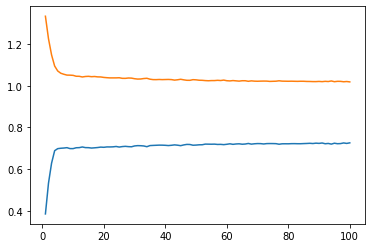

In [94]:
hist = his.history
loss = hist['loss']
val = hist['accuracy']
epoch = range(1,101)
plt.plot(epoch,val)
plt.plot(epoch,loss)
plt.show()

In [78]:
from sklearn.metrics import mean_squared_error as mse

In [95]:
test_pr = model.predict(X_test)
check =[]
for i in range(len(pred)):
    check.append(np.argmax(test_pr[i]))
mse(Y_test,check)

0.702